In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [2]:
(x_train, y_train), (x_test, y_test)= tf.keras.datasets.cifar10.load_data()

In [3]:
print("x_train_shape", x_train.shape)
print("x_test_shape", x_test.shape)
print("y_train_shape", y_train.shape)

print("y_test_shape",y_test.shape)

x_train_shape (50000, 32, 32, 3)
x_test_shape (10000, 32, 32, 3)
y_train_shape (50000, 1)
y_test_shape (10000, 1)


In [4]:
import matplotlib.pyplot as plt


/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Text(0.5, 1.0, '[3]')

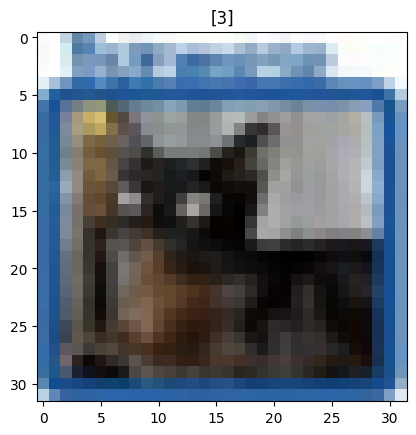

In [5]:
index = 59
plt.imshow(x_train[index])
plt.title(y_train[index])


In [6]:
# x_train = x_train.reshape(50000, 3072)
# x_test = x_test.reshape(10000, 3072)
x_train=x_train/255
x_test = x_test/255

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, ReLU, Flatten



In [8]:
x_train.shape

(50000, 32, 32, 3)

In [9]:
model = Sequential()
model.add(Conv2D(filters = 4, kernel_size=(3,3), strides = (1,1), padding= 'valid', activation= 'relu', input_shape= x_train.shape[1:])) # output_size = (30, 30, 4)
model.add(Conv2D(filters = 3, kernel_size=(3,3), strides = (1,1), padding= 'valid', activation= 'relu'))                                 # (28,28,3)
model.add(MaxPooling2D(pool_size = (2,2)))                                     # (14,14,3)

model.add(Conv2D(filters = 3, kernel_size=(3,3), strides = (1,1), padding= 'valid', activation= 'relu')) # (12,12,3)
model.add(MaxPooling2D(pool_size = (2,2)))  # (6,6,3)
model.add(Flatten())                       # 108
model.add(Dense(10, activation = 'softmax'))    # 10



In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 4)         112       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 3)         111       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 3)        0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 3)         84        
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 3)          0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 108)               0

In [11]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [12]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y_train = ohe.fit_transform(y_train)
y_test = ohe.transform(y_test)
y_train = y_train.toarray()
y_test = y_test.toarray()

In [13]:
hist = model.fit(x_train, y_train, epochs = 40, batch_size = 32, validation_data = (x_test, y_test))

Epoch 1/40
1563/1563 [==============================] - 14s 7ms/step - loss: 1.9304 - accuracy: 0.2920 - val_loss: 1.7343 - val_accuracy: 0.3732
Epoch 2/40
1563/1563 [==============================] - 13s 8ms/step - loss: 1.6786 - accuracy: 0.3928 - val_loss: 1.6410 - val_accuracy: 0.4090
Epoch 3/40
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6058 - accuracy: 0.4205 - val_loss: 1.5888 - val_accuracy: 0.4290
Epoch 4/40
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5622 - accuracy: 0.4353 - val_loss: 1.5696 - val_accuracy: 0.4382
Epoch 5/40
1563/1563 [==============================] - 7s 5ms/step - loss: 1.5332 - accuracy: 0.4469 - val_loss: 1.5133 - val_accuracy: 0.4534
Epoch 6/40
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5145 - accuracy: 0.4567 - val_loss: 1.4993 - val_accuracy: 0.4583
Epoch 7/40
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5014 - accuracy: 0.4608 - val_loss: 1.5063 - val_accurac

In [14]:
y_test_pred = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [15]:
pred_max_index = np.argmax(y_test_pred,axis = 1)

In [16]:
train_max_index = np.argmax(y_test, axis = 1)

In [17]:
count = 0
for i in range(len(train_max_index)):
  if train_max_index[i] == pred_max_index[i]:
    count+=1
count

5242

In [18]:
print(count/len(train_max_index))

0.5242


In [19]:
a = train_max_index==pred_max_index
a.sum()/len(train_max_index)

0.5242

In [19]:
# data augumentation
# pre trained model